In [9]:
import numpy as np

In [14]:
MP2RAGEimg = t1w_data
INV1img = inv1_data
INV2img = inv2_data

In [17]:
def MP2RAGErobustfunc(inv1, inv2, beta):
    return (np.conj(inv1)*inv2-beta)/(inv1**2+inv2**2+2*beta)

def rootsquares_pos(a,b,c):
    return (-b+np.sqrt(b**2-4*a*c))/(2*a)
def rootsquares_neg(a,b,c):
    return (-b-np.sqrt(b**2-4*a*c))/(2*a)

if np.min(MP2RAGEimg)>=0 and np.max(MP2RAGEimg)>=0.51:
    MP2RAGEimg = (MP2RAGEimg.astype(float) - MP2RAGEimg.astype(float).max()/2)/np.max(MP2RAGEimg.max())
    integerformat=1    
else:
    integerformat=0


# %% computes correct INV1 dataset  
INV2img = INV2img.astype(float);

# %gives the correct polarity to INV1;
INV1img = np.sign(MP2RAGEimg)*(INV1img).astype(float);


#% because the MP2RAGE INV1 and INV2 is a summ of squares data, while the
#% MP2RAGEimg is a phase sensitive coil combination.. some more maths has to
#% be performed to get a better INV1 estimate which here is done by assuming
#% both INV2 is closer to a real phase sensitive combination

INV1pos = rootsquares_pos(-MP2RAGEimg, INV2img, -(INV2img**2)*MP2RAGEimg);
INV1neg = rootsquares_neg(-MP2RAGEimg, INV2img, -(INV2img**2)*MP2RAGEimg);

INV1final = INV1img
INV1final[np.abs(INV1img-INV1pos)> np.abs(INV1img-INV1neg)]=INV1neg[np.abs(INV1img-INV1pos) >  np.abs(INV1img-INV1neg)]
INV1final[np.abs(INV1img-INV1pos)<=np.abs(INV1img-INV1neg)]=INV1pos[np.abs(INV1img-INV1pos) <= np.abs(INV1img-INV1neg)]

/home/stevenm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/stevenm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/stevenm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/stevenm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/home/stevenm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal


In [24]:
multiplyingFactor = 1
noiselevel = multiplyingFactor*np.mean(INV2img)

MP2RAGEimgRobustPhaseSensitive = MP2RAGErobustfunc(INV1final, INV2img, noiselevel**2)

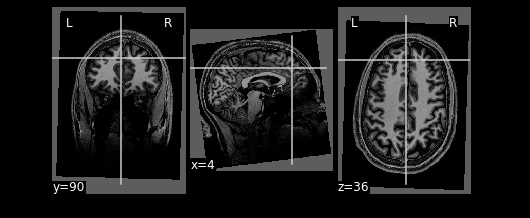

In [25]:
plotting.plot_anat(nib.Nifti1Image(MP2RAGEimgRobustPhaseSensitive, inv1_hdr.affine))

In [26]:
nib.save(nib.Nifti1Image(MP2RAGEimgRobustPhaseSensitive, inv1_hdr.affine), 'robustmp2rage.nii.gz')

In [5]:
# denoise type 2
import nibabel as nib
from nilearn import plotting
%matplotlib inline

t1w = './data/raw/bids/sub-01/ses-me/anat/sub-01_ses-me_T1w.nii'
inv2 = './data/raw/bids/sub-01/ses-me/anat/sub-01_ses-me_inv-2_MPRAGE.nii'
inv1 = './data/raw/bids/sub-01/ses-me/anat/sub-01_ses-me_inv-1_MPRAGE.nii'

/home/stevenm/miniconda3/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:397: RuntimeWarning: overflow encountered in short_scalars
  ptp = .5 * (vmax - vmin)
/home/stevenm/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


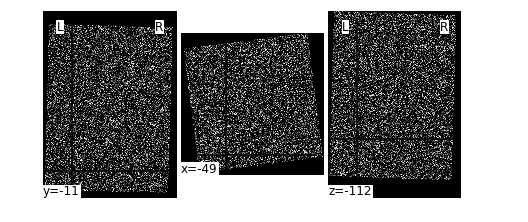

In [6]:
inv1_hdr = nib.load(inv1)
inv2_hdr = nib.load(inv2)
t1w_hdr = nib.load(t1w)

inv2_data = inv2_hdr.get_data()
inv1_data = inv1_hdr.get_data()
t1w_data = t1w_hdr.get_data()

numerator = t1w_data * ((inv2_data)**2 + (inv1_data)**2)
plotting.plot_anat(nib.Nifti1Image(numerator, inv1_hdr.affine))

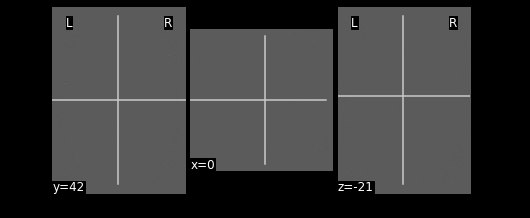

In [8]:
beta = 10
denoised = (numerator+.5*beta) / ((inv2_data**2)+(inv1_data**2)+2*beta)

plotting.plot_anat(nib.Nifti1Image(denoised, inv1_hdr.affine))

In [2]:
## Notebook to test if a certain gamma-value for noise suppression is sufficient to get a reasonable skull strip

In [4]:
t1w_denoised = './data/raw/bids_fmriprep/sub-01/ses-me/anat/sub-01_ses-me_T1w.nii'

In [5]:
!cp ./data/raw/bids_fmriprep/sub-01/ses-me/anat/sub-01_ses-me_T1w.nii ./t1w_denoised_test.nii

In [10]:
import nibabel as nib
from nilearn import plotting

t1w_denoised = nib.load('./t1w_denoised_test.nii')

/usr/local/miniconda/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/usr/local/miniconda/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/miniconda/lib/python3.7/site-packages/nilearn/datasets/neurovault.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Container


In [12]:
plotting.plot_anat(t1w_denoised)

/usr/local/miniconda/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


In [24]:
from fmriprep.workflows.anatomical import init_skullstrip_ants_wf

In [25]:
skull_strip = init_skullstrip_ants_wf(debug=False, omp_nthreads=8, skull_strip_template='OASIS')
skull_strip.base_dir = './workflow_folders/'

In [26]:
skull_strip.inputs.inputnode.in_file = '/home/neuro/work_dir/t1w_denoised_test.nii'

In [27]:
out = skull_strip.run()

190121-13:24:28,798 nipype.workflow INFO:
	 Workflow skullstrip_ants_wf settings: ['check', 'execution', 'logging', 'monitoring']
190121-13:24:28,808 nipype.workflow INFO:
	 Running serially.
190121-13:24:28,809 nipype.workflow INFO:
	 [Node] Setting-up "skullstrip_ants_wf.t1_skull_strip" in "/home/neuro/work_dir/workflow_folders/skullstrip_ants_wf/t1_skull_strip".
190121-13:24:28,829 nipype.workflow INFO:
	 [Node] Running "t1_skull_strip" ("nipype.interfaces.ants.segmentation.BrainExtraction"), a CommandLine Interface with command:
antsBrainExtraction.sh -a /home/neuro/work_dir/t1w_denoised_test.nii -m /home/neuro/work_dir/workflow_folders/skullstrip_ants_wf/t1_skull_strip/tpl-OASIS30ANTs_res-01_class-brainmask_probtissue.nii.gz -e /templateflow/tpl-OASIS30ANTs/tpl-OASIS30ANTs_res-01_T1w.nii.gz -d 3 -f /templateflow/tpl-OASIS30ANTs/tpl-OASIS30ANTs_res-01_label-BrainCerebellumExtraction_roi.nii.gz -s nii.gz -k 1 -o highres001_ -q 1 -u 1
190121-13:24:28,876 nipype.interface INFO:
	 stdo

/usr/local/miniconda/lib/python3.7/subprocess.py:658: ResourceWarning: unclosed file <_io.BufferedReader name=46>
  _cleanup()
/usr/local/miniconda/lib/python3.7/subprocess.py:658: ResourceWarning: unclosed file <_io.BufferedReader name=48>
  _cleanup()


190121-13:24:37,800 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.800748:END   <<<<<<<<<<<<<<<<<<<<
190121-13:24:37,802 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.800748:
190121-13:24:37,803 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.800748:
190121-13:24:37,804 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.804418:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:24:37,805 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.804418:/usr/lib/ants/N4BiasFieldCorrection -d 3 -i highres001_N4Truncated0.nii.gz -s 4 -c [50x50x50x50,0.0000001] -b [200] -o highres001_N4Corrected0.nii.gz --verbose 1
190121-13:24:37,825 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.825506:
190121-13:24:37,826 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.825506:Running N4 for 3-dimensional images.
190121-13:24:37,827 nipype.interface INFO:
	 stdout 2019-01-21T13:24:37.825506:
190121-13:24:38,847 nipype.interface INFO:
	 stdout 2019-01-21T13:24:38.847540:Mask not read.  Using the entire

190121-13:25:10,636 nipype.interface INFO:
	 stdout 2019-01-21T13:25:10.636210:  Iteration 41 (of 50).   Current convergence value = 5.87187e-05 (threshold = 1e-07)
190121-13:25:11,411 nipype.interface INFO:
	 stdout 2019-01-21T13:25:11.411383:  Iteration 42 (of 50).   Current convergence value = 5.82676e-05 (threshold = 1e-07)
190121-13:25:12,182 nipype.interface INFO:
	 stdout 2019-01-21T13:25:12.182902:  Iteration 43 (of 50).   Current convergence value = 5.79687e-05 (threshold = 1e-07)
190121-13:25:12,927 nipype.interface INFO:
	 stdout 2019-01-21T13:25:12.927104:  Iteration 44 (of 50).   Current convergence value = 5.75298e-05 (threshold = 1e-07)
190121-13:25:13,669 nipype.interface INFO:
	 stdout 2019-01-21T13:25:13.668955:  Iteration 45 (of 50).   Current convergence value = 5.71801e-05 (threshold = 1e-07)
190121-13:25:14,434 nipype.interface INFO:
	 stdout 2019-01-21T13:25:14.434346:  Iteration 46 (of 50).   Current convergence value = 5.68248e-05 (threshold = 1e-07)
190121-13:

190121-13:25:48,664 nipype.interface INFO:
	 stdout 2019-01-21T13:25:48.664541:  Iteration 41 (of 50).   Current convergence value = 0.000231089 (threshold = 1e-07)
190121-13:25:49,440 nipype.interface INFO:
	 stdout 2019-01-21T13:25:49.440075:  Iteration 42 (of 50).   Current convergence value = 0.000228864 (threshold = 1e-07)
190121-13:25:50,182 nipype.interface INFO:
	 stdout 2019-01-21T13:25:50.182352:  Iteration 43 (of 50).   Current convergence value = 0.000226832 (threshold = 1e-07)
190121-13:25:50,915 nipype.interface INFO:
	 stdout 2019-01-21T13:25:50.915791:  Iteration 44 (of 50).   Current convergence value = 0.000225169 (threshold = 1e-07)
190121-13:25:51,695 nipype.interface INFO:
	 stdout 2019-01-21T13:25:51.694963:  Iteration 45 (of 50).   Current convergence value = 0.000223505 (threshold = 1e-07)
190121-13:25:52,470 nipype.interface INFO:
	 stdout 2019-01-21T13:25:52.470886:  Iteration 46 (of 50).   Current convergence value = 0.00022208 (threshold = 1e-07)
190121-13:2

190121-13:26:26,551 nipype.interface INFO:
	 stdout 2019-01-21T13:26:26.551811:  Iteration 41 (of 50).   Current convergence value = 0.000510568 (threshold = 1e-07)
190121-13:26:27,338 nipype.interface INFO:
	 stdout 2019-01-21T13:26:27.338184:  Iteration 42 (of 50).   Current convergence value = 0.000503593 (threshold = 1e-07)
190121-13:26:28,111 nipype.interface INFO:
	 stdout 2019-01-21T13:26:28.111734:  Iteration 43 (of 50).   Current convergence value = 0.000497797 (threshold = 1e-07)
190121-13:26:28,852 nipype.interface INFO:
	 stdout 2019-01-21T13:26:28.852427:  Iteration 44 (of 50).   Current convergence value = 0.000492885 (threshold = 1e-07)
190121-13:26:29,689 nipype.interface INFO:
	 stdout 2019-01-21T13:26:29.689553:  Iteration 45 (of 50).   Current convergence value = 0.000489495 (threshold = 1e-07)
190121-13:26:30,435 nipype.interface INFO:
	 stdout 2019-01-21T13:26:30.435782:  Iteration 46 (of 50).   Current convergence value = 0.000484123 (threshold = 1e-07)
190121-13:

190121-13:27:04,780 nipype.interface INFO:
	 stdout 2019-01-21T13:27:04.780318:  Iteration 41 (of 50).   Current convergence value = 0.000491554 (threshold = 1e-07)
190121-13:27:05,526 nipype.interface INFO:
	 stdout 2019-01-21T13:27:05.526077:  Iteration 42 (of 50).   Current convergence value = 0.000488625 (threshold = 1e-07)
190121-13:27:06,267 nipype.interface INFO:
	 stdout 2019-01-21T13:27:06.267740:  Iteration 43 (of 50).   Current convergence value = 0.000486149 (threshold = 1e-07)
190121-13:27:07,42 nipype.interface INFO:
	 stdout 2019-01-21T13:27:07.042335:  Iteration 44 (of 50).   Current convergence value = 0.000484235 (threshold = 1e-07)
190121-13:27:07,805 nipype.interface INFO:
	 stdout 2019-01-21T13:27:07.805761:  Iteration 45 (of 50).   Current convergence value = 0.000483706 (threshold = 1e-07)
190121-13:27:08,552 nipype.interface INFO:
	 stdout 2019-01-21T13:27:08.552183:  Iteration 46 (of 50).   Current convergence value = 0.000483343 (threshold = 1e-07)
190121-13:2

190121-13:27:11,726 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         Source: (none)
190121-13:27:11,727 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         Source output name: (none)
190121-13:27:11,727 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         Release Data: Off
190121-13:27:11,728 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         Data Released: False
190121-13:27:11,729 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         Global Release Data: Off
190121-13:27:11,729 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         PipelineMTime: 0
190121-13:27:11,730 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         UpdateMTime: 0
190121-13:27:11,731 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         RealTimeStamp: 0 seconds 
190121-13:27:11,732 nipype.interface INFO:
	 stdout 2019-01-21T13:27:11.695915:         LargestPossibleRegion: 
190121-13:27:11,732 

190121-13:27:21,851 nipype.interface INFO:
	 stdout 2019-01-21T13:27:21.839975:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:27:21,852 nipype.interface INFO:
	 stdout 2019-01-21T13:27:21.839975:/usr/lib/ants/ResampleImageBySpacing 3 /templateflow/tpl-OASIS30ANTs/tpl-OASIS30ANTs_res-01_T1w.nii.gz highres001_BrainExtractionInitialAffineFixed.nii.gz 4 4 4 1
190121-13:27:22,321 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.321179: spacing [1, 1, 1] dim 3
190121-13:27:22,322 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.321179: spacing2 [4, 4, 4]
190121-13:27:22,323 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.323385: smoothing by : 3 dir 0
190121-13:27:22,381 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.381828: smoothing by : 3 dir 1
190121-13:27:22,468 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.468368: smoothing by : 3 dir 2
190121-13:27:22,563 nipype.interface INFO:
	 stdout 2019-01-21T13:27:22.563898: out space [4, 4, 4]
190121-13:27:22,565 nipype.interface INF

190121-13:27:49,981 nipype.interface INFO:
	 stdout 2019-01-21T13:27:49.981084:  fixed image: highres001_BrainExtractionTemplateLaplacian.nii.gz
190121-13:27:49,982 nipype.interface INFO:
	 stdout 2019-01-21T13:27:49.981084:  moving image: highres001_BrainExtractionLaplacian.nii.gz
190121-13:27:51,524 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Dimension = 3
190121-13:27:51,525 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Number of stages = 3
190121-13:27:51,526 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Use Histogram Matching true
190121-13:27:51,527 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Winsorize image intensities true
190121-13:27:51,528 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Lower quantile = 0.025
190121-13:27:51,529 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Upper quantile = 0.975
190121-13:27:51,530 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.524489:Stage 1 State
190121-1

190121-13:27:51,592 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Source output name: (none)
190121-13:27:51,593 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Release Data: Off
190121-13:27:51,594 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Data Released: False
190121-13:27:51,595 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Global Release Data: Off
190121-13:27:51,595 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  PipelineMTime: 0
190121-13:27:51,596 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  UpdateMTime: 1701
190121-13:27:51,597 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  RealTimeStamp: 0 seconds 
190121-13:27:51,597 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  LargestPossibleRegion: 
190121-13:27:51,598 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:    Dimension: 3
190121-13:27:51,599 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035: 

190121-13:27:51,651 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Release Data: Off
190121-13:27:51,651 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Data Released: False
190121-13:27:51,652 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  Global Release Data: Off
190121-13:27:51,653 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  PipelineMTime: 0
190121-13:27:51,654 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  UpdateMTime: 1877
190121-13:27:51,654 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  RealTimeStamp: 0 seconds 
190121-13:27:51,655 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:  LargestPossibleRegion: 
190121-13:27:51,656 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:    Dimension: 3
190121-13:27:51,656 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:    Index: [0, 0, 0]
190121-13:27:51,657 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.532035:    Size:

190121-13:27:51,712 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:  Direction: 
190121-13:27:51,712 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-0.999143 -0.0341621 -0.0233829
190121-13:27:51,713 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0.0309541 -0.991549 0.125985
190121-13:27:51,714 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-0.0274892 0.125153 0.991757
190121-13:27:51,714 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:
190121-13:27:51,715 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:  IndexToPointMatrix: 
190121-13:27:51,716 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-0.699394 -0.0239135 -0.016368
190121-13:27:51,716 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0.0216677 -0.694084 0.0881894
190121-13:27:51,717 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-0.0192423 0.0876072 0.69423
190121-13:27:51,718 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51

190121-13:27:51,771 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-1 0 0
190121-13:27:51,772 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0 -1 0
190121-13:27:51,772 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0 0 1
190121-13:27:51,773 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:
190121-13:27:51,774 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:  IndexToPointMatrix: 
190121-13:27:51,774 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-1 0 0
190121-13:27:51,775 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0 -1 0
190121-13:27:51,776 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:0 0 1
190121-13:27:51,776 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:
190121-13:27:51,777 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:  PointToIndexMatrix: 
190121-13:27:51,778 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.682630:-1 0 0
190121-13:27:51,779 nipype.interface

190121-13:27:51,884 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:  PixelContainer: 
190121-13:27:51,885 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:    ImportImageContainer (0x4ba9020)
190121-13:27:51,885 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
190121-13:27:51,886 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      Reference Count: 1
190121-13:27:51,887 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      Modified Time: 2402
190121-13:27:51,888 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      Debug: Off
190121-13:27:51,888 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      Object Name: 
190121-13:27:51,889 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:      Observers: 
190121-13:27:51,890 nipype.interface INFO:
	 stdout 2019-01-21T13:27:51.872315:        none
190121-13:27:51,890 nipype.interface INFO:


190121-13:28:00,259 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.259707: 2DIAGNOSTIC,    20, -7.618090510368e-01, 2.484467768227e-05, 5.7126e+00, 1.0827e-02, 
190121-13:28:00,269 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.269601: 2DIAGNOSTIC,    21, -7.617517709732e-01, 2.281083834532e-05, 5.7224e+00, 9.8698e-03, 
190121-13:28:00,280 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.280912: 2DIAGNOSTIC,    22, -7.619427442551e-01, 2.242741720693e-05, 5.7338e+00, 1.1303e-02, 
190121-13:28:00,290 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.290716: 2DIAGNOSTIC,    23, -7.621708512306e-01, 2.408945510979e-05, 5.7435e+00, 9.7690e-03, 
190121-13:28:00,302 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.302722: 2DIAGNOSTIC,    24, -7.625385522842e-01, 2.972390211653e-05, 5.7555e+00, 1.1982e-02, 
190121-13:28:00,312 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.312277: 2DIAGNOSTIC,    25, -7.631835937500e-01, 4.266712494427e-05, 5.7650e+00, 9.5310e-03, 
1901

190121-13:28:00,998 nipype.interface INFO:
	 stdout 2019-01-21T13:28:00.998414: 2DIAGNOSTIC,    70, -7.819890975952e-01, 4.575636012305e-07, 6.4499e+00, 1.1484e-02, 
190121-13:28:01,9 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.009522: 2DIAGNOSTIC,    71, -7.819890975952e-01, 4.499183319240e-07, 6.4609e+00, 1.1074e-02, 
190121-13:28:01,20 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.020844: 2DIAGNOSTIC,    72, -7.819889783859e-01, 4.457944839942e-07, 6.4722e+00, 1.1303e-02, 
190121-13:28:01,34 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.033964: 2DIAGNOSTIC,    73, -7.819892168045e-01, 4.412156897615e-07, 6.4853e+00, 1.3087e-02, 
190121-13:28:01,45 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.045568: 2DIAGNOSTIC,    74, -7.819896340370e-01, 4.380323730402e-07, 6.4969e+00, 1.1579e-02, 
190121-13:28:01,56 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.056805: 2DIAGNOSTIC,    75, -7.819893360138e-01, 4.339300119227e-07, 6.5081e+00, 1.1205e-02, 
190121-13:

190121-13:28:01,584 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.584715: 2DIAGNOSTIC,   120, -7.819892168045e-01, 2.644163430432e-07, 7.0348e+00, 1.1530e-02, 
190121-13:28:01,597 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.597519: 2DIAGNOSTIC,   121, -7.819892168045e-01, 2.627226649565e-07, 7.0475e+00, 1.2774e-02, 
190121-13:28:01,609 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.609023: 2DIAGNOSTIC,   122, -7.819892168045e-01, 2.611793377127e-07, 7.0590e+00, 1.1483e-02, 
190121-13:28:01,623 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.623727: 2DIAGNOSTIC,   123, -7.819892168045e-01, 2.597509762836e-07, 7.0737e+00, 1.4639e-02, 
190121-13:28:01,637 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.637890: 2DIAGNOSTIC,   124, -7.819892168045e-01, 2.576423696610e-07, 7.0878e+00, 1.4142e-02, 
190121-13:28:01,651 nipype.interface INFO:
	 stdout 2019-01-21T13:28:01.651136: 2DIAGNOSTIC,   125, -7.819892168045e-01, 2.555677269811e-07, 7.1010e+00, 1.3203e-02, 
1901

190121-13:28:02,170 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.170157: 2DIAGNOSTIC,   170, -7.819898128510e-01, 1.875924766637e-07, 7.6188e+00, 1.2535e-02, 
190121-13:28:02,181 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.181464: 2DIAGNOSTIC,   171, -7.819897532463e-01, 1.863629108811e-07, 7.6301e+00, 1.1285e-02, 
190121-13:28:02,194 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.194530: 2DIAGNOSTIC,   172, -7.819897532463e-01, 1.851637136951e-07, 7.6431e+00, 1.3035e-02, 
190121-13:28:02,205 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.205801: 2DIAGNOSTIC,   173, -7.819897532463e-01, 1.839999868025e-07, 7.6544e+00, 1.1241e-02, 
190121-13:28:02,219 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.219415: 2DIAGNOSTIC,   174, -7.819897532463e-01, 1.828791766911e-07, 7.6679e+00, 1.3576e-02, 
190121-13:28:02,231 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.231377: 2DIAGNOSTIC,   175, -7.819897532463e-01, 1.818087156380e-07, 7.6798e+00, 1.1919e-02, 
1901

190121-13:28:02,751 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.751686: 2DIAGNOSTIC,   220, -7.819894552231e-01, 1.445031330150e-07, 8.1989e+00, 1.2995e-02, 
190121-13:28:02,762 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.762620: 2DIAGNOSTIC,   221, -7.819894552231e-01, 1.435890339962e-07, 8.2098e+00, 1.0902e-02, 
190121-13:28:02,773 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.773577: 2DIAGNOSTIC,   222, -7.819894552231e-01, 1.427334836990e-07, 8.2207e+00, 1.0926e-02, 
190121-13:28:02,784 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.784925: 2DIAGNOSTIC,   223, -7.819894552231e-01, 1.419545867520e-07, 8.2320e+00, 1.1320e-02, 
190121-13:28:02,798 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.798131: 2DIAGNOSTIC,   224, -7.819894552231e-01, 1.412704051518e-07, 8.2452e+00, 1.3189e-02, 
190121-13:28:02,808 nipype.interface INFO:
	 stdout 2019-01-21T13:28:02.808807: 2DIAGNOSTIC,   225, -7.819894552231e-01, 1.406881722232e-07, 8.2559e+00, 1.0639e-02, 
1901

190121-13:28:03,343 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.343031: 2DIAGNOSTIC,   270, -7.819898128510e-01, 1.179039088584e-07, 8.7889e+00, 1.0824e-02, 
190121-13:28:03,352 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.352452: 2DIAGNOSTIC,   271, -7.819898128510e-01, 1.174675290372e-07, 8.7983e+00, 9.3942e-03, 
190121-13:28:03,364 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.364012: 2DIAGNOSTIC,   272, -7.819898128510e-01, 1.170343679746e-07, 8.8099e+00, 1.1554e-02, 
190121-13:28:03,377 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.377804: 2DIAGNOSTIC,   273, -7.819898128510e-01, 1.166043901435e-07, 8.8236e+00, 1.3762e-02, 
190121-13:28:03,393 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.393700: 2DIAGNOSTIC,   274, -7.819898128510e-01, 1.161775600167e-07, 8.8395e+00, 1.5861e-02, 
190121-13:28:03,405 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.405715: 2DIAGNOSTIC,   275, -7.819898128510e-01, 1.157538420671e-07, 8.8515e+00, 1.1990e-02, 
1901

190121-13:28:03,946 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.946461: 2DIAGNOSTIC,   320, -7.819893360138e-01, 9.905297559953e-08, 9.3911e+00, 1.0745e-02, 
190121-13:28:03,959 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.959721: 2DIAGNOSTIC,   321, -7.819893360138e-01, 9.892090702124e-08, 9.4043e+00, 1.3243e-02, 
190121-13:28:03,974 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.974450: 2DIAGNOSTIC,   322, -7.819893360138e-01, 9.881526352729e-08, 9.4190e+00, 1.4696e-02, 
190121-13:28:03,987 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.987123: 2DIAGNOSTIC,   323, -7.819893360138e-01, 9.850856486082e-08, 9.4316e+00, 1.2651e-02, 
190121-13:28:03,998 nipype.interface INFO:
	 stdout 2019-01-21T13:28:03.998594: 2DIAGNOSTIC,   324, -7.819893360138e-01, 9.820375623804e-08, 9.4431e+00, 1.1442e-02, 
190121-13:28:04,8 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.008391: 2DIAGNOSTIC,   325, -7.819893360138e-01, 9.790083765893e-08, 9.4529e+00, 9.7740e-03, 
190121

190121-13:28:04,536 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.536641: 2DIAGNOSTIC,   370, -7.819897532463e-01, 8.637854875815e-08, 9.9799e+00, 1.1960e-02, 
190121-13:28:04,548 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.548256: 2DIAGNOSTIC,   371, -7.819897532463e-01, 8.573557153113e-08, 9.9915e+00, 1.1581e-02, 
190121-13:28:04,560 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.560801: 2DIAGNOSTIC,   372, -7.819897532463e-01, 8.550459540402e-08, 1.0004e+01, 1.2513e-02, 
190121-13:28:04,572 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.572785: 2DIAGNOSTIC,   373, -7.819897532463e-01, 8.527486272669e-08, 1.0016e+01, 1.1953e-02, 
190121-13:28:04,584 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.584543: 2DIAGNOSTIC,   374, -7.819897532463e-01, 8.504635928830e-08, 1.0028e+01, 1.1739e-02, 
190121-13:28:04,596 nipype.interface INFO:
	 stdout 2019-01-21T13:28:04.596042: 2DIAGNOSTIC,   375, -7.819897532463e-01, 8.481907087798e-08, 1.0039e+01, 1.1478e-02, 
1901

190121-13:28:05,128 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.127983: 2DIAGNOSTIC,   420, -7.819899916649e-01, 7.571370730375e-08, 1.0570e+01, 1.1850e-02, 
190121-13:28:05,141 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.141007: 2DIAGNOSTIC,   421, -7.819899916649e-01, 7.553352077139e-08, 1.0583e+01, 1.2987e-02, 
190121-13:28:05,152 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.152541: 2DIAGNOSTIC,   422, -7.819899916649e-01, 7.535418689031e-08, 1.0594e+01, 1.1513e-02, 
190121-13:28:05,167 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.167253: 2DIAGNOSTIC,   423, -7.819899916649e-01, 7.517569855509e-08, 1.0609e+01, 1.4669e-02, 
190121-13:28:05,179 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.179811: 2DIAGNOSTIC,   424, -7.819899916649e-01, 7.499805576572e-08, 1.0621e+01, 1.2537e-02, 
190121-13:28:05,191 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.191343: 2DIAGNOSTIC,   425, -7.819899916649e-01, 7.482125141678e-08, 1.0633e+01, 1.1504e-02, 
1901

190121-13:28:05,725 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.725190: 2DIAGNOSTIC,   470, -7.819893360138e-01, 6.764503979184e-08, 1.1165e+01, 1.0836e-02, 
190121-13:28:05,736 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.736000: 2DIAGNOSTIC,   471, -7.819893360138e-01, 6.750117620413e-08, 1.1176e+01, 1.0796e-02, 
190121-13:28:05,746 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.746650: 2DIAGNOSTIC,   472, -7.819893360138e-01, 6.735791657775e-08, 1.1187e+01, 1.0618e-02, 
190121-13:28:05,758 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.758226: 2DIAGNOSTIC,   473, -7.819893360138e-01, 6.721526801812e-08, 1.1198e+01, 1.1567e-02, 
190121-13:28:05,769 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.769381: 2DIAGNOSTIC,   474, -7.819893360138e-01, 6.707321631438e-08, 1.1210e+01, 1.1128e-02, 
190121-13:28:05,780 nipype.interface INFO:
	 stdout 2019-01-21T13:28:05.780757: 2DIAGNOSTIC,   475, -7.819893360138e-01, 6.693176857198e-08, 1.1221e+01, 1.1350e-02, 
1901

190121-13:28:06,329 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.329318: 2DIAGNOSTIC,   520, -7.819893360138e-01, 6.113052819501e-08, 1.1768e+01, 1.4407e-02, 
190121-13:28:06,341 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.341410: 2DIAGNOSTIC,   521, -7.819893360138e-01, 6.101301153194e-08, 1.1780e+01, 1.2071e-02, 
190121-13:28:06,353 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.353638: 2DIAGNOSTIC,   522, -7.819893360138e-01, 6.089594251080e-08, 1.1793e+01, 1.2194e-02, 
190121-13:28:06,364 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.364673: 2DIAGNOSTIC,   523, -7.819893360138e-01, 6.077932823700e-08, 1.1804e+01, 1.1015e-02, 
190121-13:28:06,375 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.375911: 2DIAGNOSTIC,   524, -7.819893360138e-01, 6.066315449971e-08, 1.1815e+01, 1.1204e-02, 
190121-13:28:06,387 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.386988: 2DIAGNOSTIC,   525, -7.819893360138e-01, 6.054742840433e-08, 1.1826e+01, 1.1029e-02, 
1901

190121-13:28:06,917 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.917765: 2DIAGNOSTIC,   570, -7.819895148277e-01, 5.576055173151e-08, 1.2355e+01, 1.2018e-02, 
190121-13:28:06,928 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.928720: 2DIAGNOSTIC,   571, -7.819895148277e-01, 5.566275973479e-08, 1.2366e+01, 1.0926e-02, 
190121-13:28:06,940 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.940010: 2DIAGNOSTIC,   572, -7.819895148277e-01, 5.556530879858e-08, 1.2378e+01, 1.1266e-02, 
190121-13:28:06,951 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.951161: 2DIAGNOSTIC,   573, -7.819895148277e-01, 5.546819892288e-08, 1.2389e+01, 1.1104e-02, 
190121-13:28:06,963 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.963807: 2DIAGNOSTIC,   574, -7.819895148277e-01, 5.537142655498e-08, 1.2401e+01, 1.2618e-02, 
190121-13:28:06,978 nipype.interface INFO:
	 stdout 2019-01-21T13:28:06.978068: 2DIAGNOSTIC,   575, -7.819895148277e-01, 5.527499169489e-08, 1.2416e+01, 1.4226e-02, 
1901

190121-13:28:07,506 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.506911: 2DIAGNOSTIC,   620, -7.819893956184e-01, 5.125782109872e-08, 1.2943e+01, 1.0378e-02, 
190121-13:28:07,519 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.519332: 2DIAGNOSTIC,   621, -7.819893956184e-01, 5.117517432041e-08, 1.2956e+01, 1.2384e-02, 
190121-13:28:07,528 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.528572: 2DIAGNOSTIC,   622, -7.819893956184e-01, 5.109279044291e-08, 1.2965e+01, 9.2239e-03, 
190121-13:28:07,540 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.540380: 2DIAGNOSTIC,   623, -7.819893956184e-01, 5.101067301894e-08, 1.2977e+01, 1.1793e-02, 
190121-13:28:07,552 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.552139: 2DIAGNOSTIC,   624, -7.819893956184e-01, 5.092881849578e-08, 1.2988e+01, 1.1727e-02, 
190121-13:28:07,566 nipype.interface INFO:
	 stdout 2019-01-21T13:28:07.566182: 2DIAGNOSTIC,   625, -7.819893956184e-01, 5.084722687343e-08, 1.3002e+01, 1.4011e-02, 
1901

190121-13:28:08,100 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.099981: 2DIAGNOSTIC,   670, -7.819896936417e-01, 4.742798154211e-08, 1.3535e+01, 1.1290e-02, 
190121-13:28:08,110 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.110876: 2DIAGNOSTIC,   671, -7.819896936417e-01, 4.735721503835e-08, 1.3546e+01, 1.0840e-02, 
190121-13:28:08,122 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.122171: 2DIAGNOSTIC,   672, -7.819896936417e-01, 4.728665459197e-08, 1.3557e+01, 1.1291e-02, 
190121-13:28:08,133 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.133677: 2DIAGNOSTIC,   673, -7.819896936417e-01, 4.721630730842e-08, 1.3568e+01, 1.1473e-02, 
190121-13:28:08,145 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.145559: 2DIAGNOSTIC,   674, -7.819896936417e-01, 4.714616963497e-08, 1.3580e+01, 1.1853e-02, 
190121-13:28:08,157 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.157484: 2DIAGNOSTIC,   675, -7.819896936417e-01, 4.707624157163e-08, 1.3592e+01, 1.1891e-02, 
1901

190121-13:28:08,695 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.695911: 2DIAGNOSTIC,   720, -7.819897532463e-01, 4.413065113340e-08, 1.4129e+01, 1.1837e-02, 
190121-13:28:08,706 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.705993: 2DIAGNOSTIC,   721, -7.819897532463e-01, 4.406937392787e-08, 1.4139e+01, 1.0056e-02, 
190121-13:28:08,716 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.716903: 2DIAGNOSTIC,   722, -7.819897532463e-01, 4.400826725259e-08, 1.4150e+01, 1.0885e-02, 
190121-13:28:08,728 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.728660: 2DIAGNOSTIC,   723, -7.819897532463e-01, 4.394733110757e-08, 1.4162e+01, 1.1740e-02, 
190121-13:28:08,741 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.741527: 2DIAGNOSTIC,   724, -7.819897532463e-01, 4.388656194010e-08, 1.4175e+01, 1.2828e-02, 
190121-13:28:08,753 nipype.interface INFO:
	 stdout 2019-01-21T13:28:08.753709: 2DIAGNOSTIC,   725, -7.819897532463e-01, 4.382595975017e-08, 1.4187e+01, 1.2150e-02, 
1901

190121-13:28:09,275 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.275015: 2DIAGNOSTIC,   770, -7.819899320602e-01, 4.151906551897e-08, 1.4707e+01, 1.1117e-02, 
190121-13:28:09,285 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.285324: 2DIAGNOSTIC,   771, -7.819899320602e-01, 4.142577836319e-08, 1.4717e+01, 1.0290e-02, 
190121-13:28:09,297 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.297479: 2DIAGNOSTIC,   772, -7.819899320602e-01, 4.131287667519e-08, 1.4730e+01, 1.2127e-02, 
190121-13:28:09,308 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.308403: 2DIAGNOSTIC,   773, -7.819899320602e-01, 4.118586005575e-08, 1.4740e+01, 1.0903e-02, 
190121-13:28:09,320 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.320171: 2DIAGNOSTIC,   774, -7.819899320602e-01, 4.104854056663e-08, 1.4752e+01, 1.1740e-02, 
190121-13:28:09,329 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.329913: 2DIAGNOSTIC,   775, -7.819899320602e-01, 4.099551631498e-08, 1.4762e+01, 9.7280e-03, 
1901

190121-13:28:09,878 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.878033: 2DIAGNOSTIC,   820, -7.819901704788e-01, 3.874353993183e-08, 1.5309e+01, 1.6203e-02, 
190121-13:28:09,890 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.890709: 2DIAGNOSTIC,   821, -7.819901704788e-01, 3.869630305076e-08, 1.5321e+01, 1.2641e-02, 
190121-13:28:09,902 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.902757: 2DIAGNOSTIC,   822, -7.819901704788e-01, 3.864917985652e-08, 1.5333e+01, 1.2018e-02, 
190121-13:28:09,914 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.914946: 2DIAGNOSTIC,   823, -7.819901704788e-01, 3.860217390184e-08, 1.5346e+01, 1.2165e-02, 
190121-13:28:09,926 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.926323: 2DIAGNOSTIC,   824, -7.819901704788e-01, 3.855528163399e-08, 1.5357e+01, 1.1344e-02, 
190121-13:28:09,938 nipype.interface INFO:
	 stdout 2019-01-21T13:28:09.938074: 2DIAGNOSTIC,   825, -7.819901704788e-01, 3.850849950027e-08, 1.5369e+01, 1.1725e-02, 
1901

190121-13:28:10,475 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.475069: 2DIAGNOSTIC,   870, -7.819898128510e-01, 3.651480184885e-08, 1.5904e+01, 1.1988e-02, 
190121-13:28:10,486 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.486865: 2DIAGNOSTIC,   871, -7.819898128510e-01, 3.647283719488e-08, 1.5916e+01, 1.1791e-02, 
190121-13:28:10,498 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.498579: 2DIAGNOSTIC,   872, -7.819898128510e-01, 3.643097201689e-08, 1.5928e+01, 1.1681e-02, 
190121-13:28:10,510 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.510736: 2DIAGNOSTIC,   873, -7.819898128510e-01, 3.638920276217e-08, 1.5940e+01, 1.2119e-02, 
190121-13:28:10,522 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.522311: 2DIAGNOSTIC,   874, -7.819898128510e-01, 3.634752943071e-08, 1.5952e+01, 1.1555e-02, 
190121-13:28:10,533 nipype.interface INFO:
	 stdout 2019-01-21T13:28:10.533383: 2DIAGNOSTIC,   875, -7.819898128510e-01, 3.630595202253e-08, 1.5963e+01, 1.1037e-02, 
1901

190121-13:28:11,53 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.053698: 2DIAGNOSTIC,   920, -7.819892764091e-01, 3.452852226360e-08, 1.6482e+01, 1.2164e-02, 
190121-13:28:11,64 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.064642: 2DIAGNOSTIC,   921, -7.819892764091e-01, 3.449099850172e-08, 1.6493e+01, 1.0921e-02, 
190121-13:28:11,76 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.076329: 2DIAGNOSTIC,   922, -7.819892764091e-01, 3.445355645226e-08, 1.6504e+01, 1.1652e-02, 
190121-13:28:11,90 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.090530: 2DIAGNOSTIC,   923, -7.819892764091e-01, 3.441619611522e-08, 1.6519e+01, 1.4165e-02, 
190121-13:28:11,103 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.103688: 2DIAGNOSTIC,   924, -7.819892764091e-01, 3.437891749059e-08, 1.6532e+01, 1.3146e-02, 
190121-13:28:11,113 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.113913: 2DIAGNOSTIC,   925, -7.819892764091e-01, 3.434171702565e-08, 1.6542e+01, 1.0184e-02, 
190121-1

190121-13:28:11,640 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.639961: 2DIAGNOSTIC,   970, -7.819892764091e-01, 3.274720938862e-08, 1.7067e+01, 1.3643e-02, 
190121-13:28:11,649 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.649837: 2DIAGNOSTIC,   971, -7.819892764091e-01, 3.271345505595e-08, 1.7077e+01, 9.8400e-03, 
190121-13:28:11,665 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.665381: 2DIAGNOSTIC,   972, -7.819892764091e-01, 3.267977177757e-08, 1.7092e+01, 1.5507e-02, 
190121-13:28:11,680 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.680018: 2DIAGNOSTIC,   973, -7.819892764091e-01, 3.264615600074e-08, 1.7107e+01, 1.4607e-02, 
190121-13:28:11,692 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.692019: 2DIAGNOSTIC,   974, -7.819892764091e-01, 3.261261127818e-08, 1.7119e+01, 1.1972e-02, 
190121-13:28:11,708 nipype.interface INFO:
	 stdout 2019-01-21T13:28:11.708470: 2DIAGNOSTIC,   975, -7.819892764091e-01, 3.257913405719e-08, 1.7135e+01, 1.6405e-02, 
1901

190121-13:28:16,484 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.484173: 2DIAGNOSTIC,    20, -5.752196907997e-01, 7.779416773701e-05, 2.1910e+01, 3.4914e-02, 
190121-13:28:16,526 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.526178: 2DIAGNOSTIC,    21, -5.753476023674e-01, 4.226303644828e-05, 2.1952e+01, 4.1963e-02, 
190121-13:28:16,566 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.566867: 2DIAGNOSTIC,    22, -5.755447149277e-01, 2.805601616274e-05, 2.1992e+01, 4.0632e-02, 
190121-13:28:16,601 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.601391: 2DIAGNOSTIC,    23, -5.757676959038e-01, 3.321095937281e-05, 2.2027e+01, 3.4514e-02, 
190121-13:28:16,639 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.639540: 2DIAGNOSTIC,    24, -5.760861039162e-01, 4.434429138200e-05, 2.2065e+01, 3.8111e-02, 
190121-13:28:16,703 nipype.interface INFO:
	 stdout 2019-01-21T13:28:16.703794: 2DIAGNOSTIC,    25, -5.764600634575e-01, 5.941105700913e-05, 2.2129e+01, 6.4215e-02, 
1901

190121-13:28:18,432 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.432166: 2DIAGNOSTIC,    70, -5.794637799263e-01, 2.060824328964e-07, 2.3856e+01, 4.2479e-02, 
190121-13:28:18,468 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.468065: 2DIAGNOSTIC,    71, -5.794644355774e-01, 3.322969348574e-07, 2.3892e+01, 3.5876e-02, 
190121-13:28:18,504 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.504327: 2DIAGNOSTIC,    72, -5.794643163681e-01, 4.728233022888e-07, 2.3928e+01, 3.6227e-02, 
190121-13:28:18,536 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.536295: 2DIAGNOSTIC,    73, -5.794656276703e-01, 4.750172593049e-07, 2.3960e+01, 3.1947e-02, 
190121-13:28:18,574 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.574220: 2DIAGNOSTIC,    74, -5.794659256935e-01, 4.791372703039e-07, 2.3998e+01, 3.7892e-02, 
190121-13:28:18,614 nipype.interface INFO:
	 stdout 2019-01-21T13:28:18.614383: 2DIAGNOSTIC,    75, -5.794667601585e-01, 4.863529170507e-07, 2.4038e+01, 4.0127e-02, 
1901

190121-13:28:20,411 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.410985: 2DIAGNOSTIC,   120, -5.794711709023e-01, 2.670458343346e-07, 2.5833e+01, 3.8257e-02, 
190121-13:28:20,449 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.449305: 2DIAGNOSTIC,   121, -5.794708728790e-01, 2.631729785207e-07, 2.5872e+01, 3.8290e-02, 
190121-13:28:20,488 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.488381: 2DIAGNOSTIC,   122, -5.794709324837e-01, 2.608259990211e-07, 2.5911e+01, 3.9047e-02, 
190121-13:28:20,529 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.529382: 2DIAGNOSTIC,   123, -5.794709920883e-01, 2.594327952465e-07, 2.5952e+01, 4.0983e-02, 
190121-13:28:20,570 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.570098: 2DIAGNOSTIC,   124, -5.794708728790e-01, 2.574921609266e-07, 2.5992e+01, 4.0673e-02, 
190121-13:28:20,608 nipype.interface INFO:
	 stdout 2019-01-21T13:28:20.608110: 2DIAGNOSTIC,   125, -5.794709920883e-01, 2.553074978096e-07, 2.6030e+01, 3.7992e-02, 
1901

190121-13:28:22,425 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.425703: 2DIAGNOSTIC,   170, -5.794706940651e-01, 1.862317020596e-07, 2.7846e+01, 4.6463e-02, 
190121-13:28:22,470 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.470008: 2DIAGNOSTIC,   171, -5.794706940651e-01, 1.852544642134e-07, 2.7891e+01, 4.4256e-02, 
190121-13:28:22,512 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.512728: 2DIAGNOSTIC,   172, -5.794707536697e-01, 1.850529685044e-07, 2.7933e+01, 4.2694e-02, 
190121-13:28:22,552 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.552889: 2DIAGNOSTIC,   173, -5.794708132744e-01, 1.844506698490e-07, 2.7974e+01, 4.0120e-02, 
190121-13:28:22,592 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.592448: 2DIAGNOSTIC,   174, -5.794705748558e-01, 1.839788978941e-07, 2.8013e+01, 3.9533e-02, 
190121-13:28:22,634 nipype.interface INFO:
	 stdout 2019-01-21T13:28:22.634249: 2DIAGNOSTIC,   175, -5.794708132744e-01, 1.834511351717e-07, 2.8055e+01, 4.1769e-02, 
1901

190121-13:28:24,431 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.431899: 2DIAGNOSTIC,   220, -5.794706344604e-01, 1.449420778954e-07, 2.9851e+01, 3.7288e-02, 
190121-13:28:24,465 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.465861: 2DIAGNOSTIC,   221, -5.794706344604e-01, 1.437324783637e-07, 2.9885e+01, 3.3940e-02, 
190121-13:28:24,503 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.503143: 2DIAGNOSTIC,   222, -5.794706344604e-01, 1.430672824654e-07, 2.9922e+01, 3.7252e-02, 
190121-13:28:24,543 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.543294: 2DIAGNOSTIC,   223, -5.794706344604e-01, 1.425559901236e-07, 2.9962e+01, 4.0125e-02, 
190121-13:28:24,575 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.575908: 2DIAGNOSTIC,   224, -5.794706344604e-01, 1.419185480245e-07, 2.9995e+01, 3.2597e-02, 
190121-13:28:24,616 nipype.interface INFO:
	 stdout 2019-01-21T13:28:24.616398: 2DIAGNOSTIC,   225, -5.794706344604e-01, 1.412867760564e-07, 3.0035e+01, 4.0448e-02, 
1901

190121-13:28:26,391 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.391621: 2DIAGNOSTIC,   270, -5.794706344604e-01, 1.177072448399e-07, 3.1809e+01, 3.8784e-02, 
190121-13:28:26,425 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.425461: 2DIAGNOSTIC,   271, -5.794706344604e-01, 1.172723145260e-07, 3.1843e+01, 3.3807e-02, 
190121-13:28:26,464 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.464115: 2DIAGNOSTIC,   272, -5.794706344604e-01, 1.168405887597e-07, 3.1882e+01, 3.8622e-02, 
190121-13:28:26,500 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.500659: 2DIAGNOSTIC,   273, -5.794706344604e-01, 1.164120320141e-07, 3.1918e+01, 3.6525e-02, 
190121-13:28:26,539 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.539472: 2DIAGNOSTIC,   274, -5.794706344604e-01, 1.159866087619e-07, 3.1957e+01, 3.8781e-02, 
190121-13:28:26,577 nipype.interface INFO:
	 stdout 2019-01-21T13:28:26.577321: 2DIAGNOSTIC,   275, -5.794706344604e-01, 1.155642763706e-07, 3.1995e+01, 3.7823e-02, 
1901

190121-13:28:28,336 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.336751: 2DIAGNOSTIC,   320, -5.794710516930e-01, 9.929464539482e-08, 3.3753e+01, 3.9026e-02, 
190121-13:28:28,379 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.379375: 2DIAGNOSTIC,   321, -5.794710516930e-01, 9.898496244887e-08, 3.3796e+01, 4.2575e-02, 
190121-13:28:28,425 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.425279: 2DIAGNOSTIC,   322, -5.794710516930e-01, 9.867721217915e-08, 3.3841e+01, 4.5854e-02, 
190121-13:28:28,468 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.468519: 2DIAGNOSTIC,   323, -5.794710516930e-01, 9.837135905855e-08, 3.3885e+01, 4.3209e-02, 
190121-13:28:28,509 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.509799: 2DIAGNOSTIC,   324, -5.794710516930e-01, 9.806740308704e-08, 3.3926e+01, 4.1247e-02, 
190121-13:28:28,551 nipype.interface INFO:
	 stdout 2019-01-21T13:28:28.551812: 2DIAGNOSTIC,   325, -5.794710516930e-01, 9.776532294836e-08, 3.3968e+01, 4.1997e-02, 
1901

190121-13:28:30,413 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.413806: 2DIAGNOSTIC,   370, -5.794710516930e-01, 8.586324895532e-08, 3.5828e+01, 5.3522e-02, 
190121-13:28:30,463 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.463631: 2DIAGNOSTIC,   371, -5.794710516930e-01, 8.563158360175e-08, 3.5878e+01, 4.9779e-02, 
190121-13:28:30,516 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.516671: 2DIAGNOSTIC,   372, -5.794710516930e-01, 8.540116880340e-08, 3.5931e+01, 5.3015e-02, 
190121-13:28:30,560 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.560039: 2DIAGNOSTIC,   373, -5.794710516930e-01, 8.517198324398e-08, 3.5975e+01, 4.3333e-02, 
190121-13:28:30,615 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.615834: 2DIAGNOSTIC,   374, -5.794710516930e-01, 8.494403402892e-08, 3.6030e+01, 5.5763e-02, 
190121-13:28:30,665 nipype.interface INFO:
	 stdout 2019-01-21T13:28:30.665398: 2DIAGNOSTIC,   375, -5.794710516930e-01, 8.471729273651e-08, 3.6080e+01, 4.9528e-02, 
1901

190121-13:28:32,512 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.512743: 2DIAGNOSTIC,   420, -5.794710516930e-01, 7.563257753418e-08, 3.7926e+01, 3.9510e-02, 
190121-13:28:32,551 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.550984: 2DIAGNOSTIC,   421, -5.794710516930e-01, 7.545276758947e-08, 3.7964e+01, 3.8219e-02, 
190121-13:28:32,588 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.588366: 2DIAGNOSTIC,   422, -5.794710516930e-01, 7.527381740147e-08, 3.8001e+01, 3.7347e-02, 
190121-13:28:32,629 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.629367: 2DIAGNOSTIC,   423, -5.794710516930e-01, 7.509571275932e-08, 3.8042e+01, 4.0967e-02, 
190121-13:28:32,672 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.672545: 2DIAGNOSTIC,   424, -5.794710516930e-01, 7.491844655760e-08, 3.8085e+01, 4.3154e-02, 
190121-13:28:32,710 nipype.interface INFO:
	 stdout 2019-01-21T13:28:32.710288: 2DIAGNOSTIC,   425, -5.794710516930e-01, 7.474201879631e-08, 3.8123e+01, 3.7705e-02, 
1901

190121-13:28:34,507 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.507634: 2DIAGNOSTIC,   470, -5.794711112976e-01, 6.758033066490e-08, 3.9919e+01, 3.9308e-02, 
190121-13:28:34,547 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.547931: 2DIAGNOSTIC,   471, -5.794711112976e-01, 6.743673708343e-08, 3.9959e+01, 4.0264e-02, 
190121-13:28:34,589 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.589576: 2DIAGNOSTIC,   472, -5.794711112976e-01, 6.729375456871e-08, 4.0001e+01, 4.1609e-02, 
190121-13:28:34,629 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.629278: 2DIAGNOSTIC,   473, -5.794711112976e-01, 6.715137601532e-08, 4.0041e+01, 3.9678e-02, 
190121-13:28:34,671 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.671278: 2DIAGNOSTIC,   474, -5.794711112976e-01, 6.700959431782e-08, 4.0083e+01, 4.1973e-02, 
190121-13:28:34,706 nipype.interface INFO:
	 stdout 2019-01-21T13:28:34.706844: 2DIAGNOSTIC,   475, -5.794711112976e-01, 6.686841658166e-08, 4.0118e+01, 3.5524e-02, 
1901

190121-13:28:43,601 nipype.interface INFO:
	 stdout 2019-01-21T13:28:43.601067: 2DIAGNOSTIC,    20, -4.651039838791e-01, 3.138940201097e-06, 4.9011e+01, 2.3011e-01, 
190121-13:28:43,827 nipype.interface INFO:
	 stdout 2019-01-21T13:28:43.827464: 2DIAGNOSTIC,    21, -4.651213288307e-01, 2.874116944440e-06, 4.9237e+01, 2.2636e-01, 
190121-13:28:44,41 nipype.interface INFO:
	 stdout 2019-01-21T13:28:44.041738: 2DIAGNOSTIC,    22, -4.651555716991e-01, 4.350949438958e-06, 4.9451e+01, 2.1425e-01, 
190121-13:28:44,302 nipype.interface INFO:
	 stdout 2019-01-21T13:28:44.302182: 2DIAGNOSTIC,    23, -4.652062058449e-01, 6.853453214717e-06, 4.9712e+01, 2.6040e-01, 
190121-13:28:44,546 nipype.interface INFO:
	 stdout 2019-01-21T13:28:44.546399: 2DIAGNOSTIC,    24, -4.652597606182e-01, 9.935261914507e-06, 4.9956e+01, 2.4419e-01, 
190121-13:28:44,780 nipype.interface INFO:
	 stdout 2019-01-21T13:28:44.780714: 2DIAGNOSTIC,    25, -4.653708636761e-01, 1.470006191084e-05, 5.0190e+01, 2.3429e-01, 
19012

190121-13:28:57,320 nipype.interface INFO:
	 stdout 2019-01-21T13:28:57.320385: 2DIAGNOSTIC,    70, -4.659572243690e-01, 4.559391868497e-07, 6.2728e+01, 2.7837e-01, 
190121-13:28:57,605 nipype.interface INFO:
	 stdout 2019-01-21T13:28:57.605182: 2DIAGNOSTIC,    71, -4.659568965435e-01, 4.523876384610e-07, 6.3013e+01, 2.8481e-01, 
190121-13:28:57,871 nipype.interface INFO:
	 stdout 2019-01-21T13:28:57.871042: 2DIAGNOSTIC,    72, -4.659566879272e-01, 4.449964592368e-07, 6.3279e+01, 2.6582e-01, 
190121-13:28:58,240 nipype.interface INFO:
	 stdout 2019-01-21T13:28:58.240335: 2DIAGNOSTIC,    73, -4.659593701363e-01, 4.626342615666e-07, 6.3648e+01, 3.6925e-01, 
190121-13:28:58,552 nipype.interface INFO:
	 stdout 2019-01-21T13:28:58.552560: 2DIAGNOSTIC,    74, -4.659598469734e-01, 4.792814820576e-07, 6.3961e+01, 3.1219e-01, 
190121-13:28:58,826 nipype.interface INFO:
	 stdout 2019-01-21T13:28:58.826083: 2DIAGNOSTIC,    75, -4.659595489502e-01, 4.896701852886e-07, 6.4234e+01, 2.7350e-01, 
1901

190121-13:29:11,232 nipype.interface INFO:
	 stdout 2019-01-21T13:29:11.232727: 2DIAGNOSTIC,   120, -4.659593403339e-01, 2.629841162616e-07, 7.6639e+01, 2.6212e-01, 
190121-13:29:11,509 nipype.interface INFO:
	 stdout 2019-01-21T13:29:11.509242: 2DIAGNOSTIC,   121, -4.659593999386e-01, 2.619454448904e-07, 7.6916e+01, 2.7649e-01, 
190121-13:29:11,782 nipype.interface INFO:
	 stdout 2019-01-21T13:29:11.782873: 2DIAGNOSTIC,   122, -4.659594595432e-01, 2.603576376714e-07, 7.7189e+01, 2.7359e-01, 
190121-13:29:12,78 nipype.interface INFO:
	 stdout 2019-01-21T13:29:12.078176: 2DIAGNOSTIC,   123, -4.659594893456e-01, 2.595392345484e-07, 7.7484e+01, 2.9527e-01, 
190121-13:29:12,366 nipype.interface INFO:
	 stdout 2019-01-21T13:29:12.366832: 2DIAGNOSTIC,   124, -4.659593999386e-01, 2.577202735665e-07, 7.7773e+01, 2.8862e-01, 
190121-13:29:12,654 nipype.interface INFO:
	 stdout 2019-01-21T13:29:12.654662: 2DIAGNOSTIC,   125, -4.659594595432e-01, 2.559252152423e-07, 7.8061e+01, 2.8781e-01, 
19012

190121-13:29:24,800 nipype.interface INFO:
	 stdout 2019-01-21T13:29:24.799918: 2DIAGNOSTIC,   170, -4.659593701363e-01, 1.846808004302e-07, 9.0205e+01, 2.6108e-01, 
190121-13:29:25,81 nipype.interface INFO:
	 stdout 2019-01-21T13:29:25.081657: 2DIAGNOSTIC,   171, -4.659594595432e-01, 1.845832997560e-07, 9.0486e+01, 2.8172e-01, 
190121-13:29:25,381 nipype.interface INFO:
	 stdout 2019-01-21T13:29:25.381013: 2DIAGNOSTIC,   172, -4.659594297409e-01, 1.842477246328e-07, 9.0786e+01, 2.9931e-01, 
190121-13:29:25,653 nipype.interface INFO:
	 stdout 2019-01-21T13:29:25.653881: 2DIAGNOSTIC,   173, -4.659593403339e-01, 1.838735386173e-07, 9.1058e+01, 2.7282e-01, 
190121-13:29:25,927 nipype.interface INFO:
	 stdout 2019-01-21T13:29:25.927325: 2DIAGNOSTIC,   174, -4.659593403339e-01, 1.828610720622e-07, 9.1332e+01, 2.7343e-01, 
190121-13:29:26,206 nipype.interface INFO:
	 stdout 2019-01-21T13:29:26.206751: 2DIAGNOSTIC,   175, -4.659593105316e-01, 1.819395265557e-07, 9.1611e+01, 2.7940e-01, 
19012

190121-13:29:38,805 nipype.interface INFO:
	 stdout 2019-01-21T13:29:38.805293: 2DIAGNOSTIC,   220, -4.659590721130e-01, 1.419097230837e-07, 1.0421e+02, 2.8198e-01, 
190121-13:29:39,104 nipype.interface INFO:
	 stdout 2019-01-21T13:29:39.104708: 2DIAGNOSTIC,   221, -4.659589529037e-01, 1.409713235034e-07, 1.0451e+02, 2.9938e-01, 
190121-13:29:39,368 nipype.interface INFO:
	 stdout 2019-01-21T13:29:39.368422: 2DIAGNOSTIC,   222, -4.659591317177e-01, 1.406204432897e-07, 1.0477e+02, 2.6366e-01, 
190121-13:29:39,638 nipype.interface INFO:
	 stdout 2019-01-21T13:29:39.637958: 2DIAGNOSTIC,   223, -4.659593999386e-01, 1.418789281615e-07, 1.0504e+02, 2.6951e-01, 
190121-13:29:39,906 nipype.interface INFO:
	 stdout 2019-01-21T13:29:39.906409: 2DIAGNOSTIC,   224, -4.659593999386e-01, 1.429145868315e-07, 1.0531e+02, 2.6841e-01, 
190121-13:29:40,187 nipype.interface INFO:
	 stdout 2019-01-21T13:29:40.186978: 2DIAGNOSTIC,   225, -4.659592509270e-01, 1.430329064078e-07, 1.0559e+02, 2.8053e-01, 
1901

190121-13:30:25,573 nipype.interface INFO:
	 stdout 2019-01-21T13:30:25.573258: 2DIAGNOSTIC,    20, -3.472380638123e-01, 1.428099039913e-06, 1.5097e+02, 1.6214e+00, 
190121-13:30:27,146 nipype.interface INFO:
	 stdout 2019-01-21T13:30:27.146175: 2DIAGNOSTIC,    21, -3.472381830215e-01, 1.405407488164e-06, 1.5255e+02, 1.5729e+00, 
190121-13:30:28,823 nipype.interface INFO:
	 stdout 2019-01-21T13:30:28.823543: 2DIAGNOSTIC,    22, -3.472376465797e-01, 1.367428581034e-06, 1.5422e+02, 1.6773e+00, 
190121-13:30:30,990 nipype.interface INFO:
	 stdout 2019-01-21T13:30:30.990501: 2DIAGNOSTIC,    23, -3.472376167774e-01, 1.323456103819e-06, 1.5639e+02, 2.1669e+00, 
190121-13:30:33,120 nipype.interface INFO:
	 stdout 2019-01-21T13:30:33.120044: 2DIAGNOSTIC,    24, -3.472376763821e-01, 1.281173695133e-06, 1.5852e+02, 2.1295e+00, 
190121-13:30:34,743 nipype.interface INFO:
	 stdout 2019-01-21T13:30:34.743287: 2DIAGNOSTIC,    25, -3.472376167774e-01, 1.230040766131e-06, 1.6014e+02, 1.6232e+00, 
1901

190121-13:31:47,260 nipype.interface INFO:
	 stdout 2019-01-21T13:31:47.260283: 2DIAGNOSTIC,    70, -3.472373187542e-01, 4.474898673834e-07, 2.3266e+02, 1.5348e+00, 
190121-13:31:48,720 nipype.interface INFO:
	 stdout 2019-01-21T13:31:48.720543: 2DIAGNOSTIC,    71, -3.472372889519e-01, 4.421703749813e-07, 2.3412e+02, 1.4602e+00, 
190121-13:31:50,384 nipype.interface INFO:
	 stdout 2019-01-21T13:31:50.384197: 2DIAGNOSTIC,    72, -3.472375273705e-01, 4.405006848174e-07, 2.3578e+02, 1.6636e+00, 
190121-13:31:52,99 nipype.interface INFO:
	 stdout 2019-01-21T13:31:52.099723: 2DIAGNOSTIC,    73, -3.472374975681e-01, 4.375315256766e-07, 2.3750e+02, 1.7155e+00, 
190121-13:31:53,674 nipype.interface INFO:
	 stdout 2019-01-21T13:31:53.674550: 2DIAGNOSTIC,    74, -3.472375273705e-01, 4.341565897903e-07, 2.3907e+02, 1.5748e+00, 
190121-13:31:55,340 nipype.interface INFO:
	 stdout 2019-01-21T13:31:55.340603: 2DIAGNOSTIC,    75, -3.472374677658e-01, 4.291080415442e-07, 2.4074e+02, 1.6660e+00, 
19012

190121-13:32:43,774 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.774431: 2DIAGNOSTIC,     6, -7.923449277878e-01, inf, 5.4584e+00, 9.6011e-03, 
190121-13:32:43,787 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.787346: 2DIAGNOSTIC,     7, -7.956596612930e-01, inf, 5.4713e+00, 1.2893e-02, 
190121-13:32:43,796 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.796598: 2DIAGNOSTIC,     8, -7.964475154877e-01, inf, 5.4806e+00, 9.2368e-03, 
190121-13:32:43,809 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.809380: 2DIAGNOSTIC,     9, -7.974641323090e-01, inf, 5.4933e+00, 1.2759e-02, 
190121-13:32:43,822 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.821980: 2DIAGNOSTIC,    10, -7.979300618172e-01, 2.133278874680e-03, 5.5059e+00, 1.2590e-02, 
190121-13:32:43,831 nipype.interface INFO:
	 stdout 2019-01-21T13:32:43.831219: 2DIAGNOSTIC,    11, -7.980947494507e-01, 1.692208345048e-03, 5.5151e+00, 9.2151e-03, 
190121-13:32:43,839 nipype.interface INFO:
	 stdout 2019-01-21T1

190121-13:32:48,618 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.618239: 2DIAGNOSTIC,    17, -6.121121048927e-01, 6.694062903989e-05, 1.0301e+01, 7.7625e-02, 
190121-13:32:48,674 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.674407: 2DIAGNOSTIC,    18, -6.122469902039e-01, 8.179691212717e-05, 1.0357e+01, 5.6138e-02, 
190121-13:32:48,722 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.722367: 2DIAGNOSTIC,    19, -6.123287081718e-01, 8.974033698905e-05, 1.0405e+01, 4.7915e-02, 
190121-13:32:48,772 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.772066: 2DIAGNOSTIC,    20, -6.123555898666e-01, 9.010854410008e-05, 1.0454e+01, 4.9659e-02, 
190121-13:32:48,821 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.821020: 2DIAGNOSTIC,    21, -6.123917698860e-01, 8.369715214940e-05, 1.0503e+01, 4.8939e-02, 
190121-13:32:48,894 nipype.interface INFO:
	 stdout 2019-01-21T13:32:48.894130: 2DIAGNOSTIC,    22, -6.124202609062e-01, 7.074492168613e-05, 1.0576e+01, 7.3080e-02, 
1901

190121-13:33:00,231 nipype.interface INFO:
	 stdout 2019-01-21T13:33:00.231378: 2DIAGNOSTIC,    22, -4.876704514027e-01, 4.070855356986e-05, 2.1912e+01, 3.0836e-01, 
190121-13:33:00,625 nipype.interface INFO:
	 stdout 2019-01-21T13:33:00.625613: 2DIAGNOSTIC,    23, -4.876674413681e-01, 2.970092100441e-05, 2.2306e+01, 3.9420e-01, 
190121-13:33:00,982 nipype.interface INFO:
	 stdout 2019-01-21T13:33:00.982430: 2DIAGNOSTIC,    24, -4.876756668091e-01, 1.956249434443e-05, 2.2663e+01, 3.5679e-01, 
190121-13:33:01,258 nipype.interface INFO:
	 stdout 2019-01-21T13:33:01.258109: 2DIAGNOSTIC,    25, -4.876735806465e-01, 1.269854965358e-05, 2.2939e+01, 2.7566e-01, 
190121-13:33:01,609 nipype.interface INFO:
	 stdout 2019-01-21T13:33:01.609480: 2DIAGNOSTIC,    26, -4.876831471920e-01, 9.332462468592e-06, 2.3290e+01, 3.5133e-01, 
190121-13:33:02,28 nipype.interface INFO:
	 stdout 2019-01-21T13:33:02.028539: 2DIAGNOSTIC,    27, -4.876899123192e-01, 6.207704700500e-06, 2.3709e+01, 4.1901e-01, 
19012

190121-13:33:17,441 nipype.interface INFO:
	 stdout 2019-01-21T13:33:17.441699: 2DIAGNOSTIC,    72, -4.878161549568e-01, 2.644174173838e-06, 3.9121e+01, 3.3457e-01, 
190121-13:33:17,778 nipype.interface INFO:
	 stdout 2019-01-21T13:33:17.778454: 2DIAGNOSTIC,    73, -4.878110587597e-01, 2.653799128893e-06, 3.9457e+01, 3.3671e-01, 
190121-13:33:18,124 nipype.interface INFO:
	 stdout 2019-01-21T13:33:18.124040: 2DIAGNOSTIC,    74, -4.878142178059e-01, 2.451015916449e-06, 3.9803e+01, 3.4556e-01, 
190121-13:33:18,462 nipype.interface INFO:
	 stdout 2019-01-21T13:33:18.462727: 2DIAGNOSTIC,    75, -4.877820909023e-01, 1.856458311522e-06, 4.0142e+01, 3.3865e-01, 
190121-13:33:18,814 nipype.interface INFO:
	 stdout 2019-01-21T13:33:18.814531: 2DIAGNOSTIC,    76, -4.877821207047e-01, 1.236633579538e-06, 4.0493e+01, 3.5175e-01, 
190121-13:33:19,266 nipype.interface INFO:
	 stdout 2019-01-21T13:33:19.266699: 2DIAGNOSTIC,    77, -4.877804219723e-01, 6.363698048517e-07, 4.0946e+01, 4.5213e-01, 
1901

190121-13:34:55,803 nipype.interface INFO:
	 stdout 2019-01-21T13:34:55.803646: 2DIAGNOSTIC,    44, -3.633284270763e-01, 7.189817097242e-07, 1.3748e+02, 2.1041e+00, 
190121-13:34:57,872 nipype.interface INFO:
	 stdout 2019-01-21T13:34:57.872880: 2DIAGNOSTIC,    45, -3.633284270763e-01, 7.053847639327e-07, 1.3955e+02, 2.0692e+00, 
190121-13:34:59,967 nipype.interface INFO:
	 stdout 2019-01-21T13:34:59.967831: 2DIAGNOSTIC,    46, -3.633283972740e-01, 6.913066954439e-07, 1.4165e+02, 2.0949e+00, 
190121-13:35:02,555 nipype.interface INFO:
	 stdout 2019-01-21T13:35:02.554997: 2DIAGNOSTIC,    47, -3.633283674717e-01, 6.763178248548e-07, 1.4423e+02, 2.5871e+00, 
190121-13:35:04,669 nipype.interface INFO:
	 stdout 2019-01-21T13:35:04.669152: 2DIAGNOSTIC,    48, -3.633283972740e-01, 6.589676786461e-07, 1.4635e+02, 2.1141e+00, 
190121-13:35:06,752 nipype.interface INFO:
	 stdout 2019-01-21T13:35:06.752864: 2DIAGNOSTIC,    49, -3.633283674717e-01, 6.435445811803e-07, 1.4843e+02, 2.0837e+00, 
1901

190121-13:36:40,537 nipype.interface INFO:
	 stdout 2019-01-21T13:36:40.537264: 2DIAGNOSTIC,    94, -3.633284866810e-01, 3.370521994839e-07, 2.4221e+02, 2.0841e+00, 
190121-13:36:42,565 nipype.interface INFO:
	 stdout 2019-01-21T13:36:42.565905: 2DIAGNOSTIC,    95, -3.633285164833e-01, 3.337489431487e-07, 2.4424e+02, 2.0286e+00, 
190121-13:36:44,640 nipype.interface INFO:
	 stdout 2019-01-21T13:36:44.640777: 2DIAGNOSTIC,    96, -3.633285760880e-01, 3.312497085517e-07, 2.4632e+02, 2.0748e+00, 
190121-13:36:46,591 nipype.interface INFO:
	 stdout 2019-01-21T13:36:46.591244: 2DIAGNOSTIC,    97, -3.633285164833e-01, 3.287454433121e-07, 2.4827e+02, 1.9504e+00, 
190121-13:36:48,649 nipype.interface INFO:
	 stdout 2019-01-21T13:36:48.649398: 2DIAGNOSTIC,    98, -3.633285760880e-01, 3.261732786086e-07, 2.5032e+02, 2.0581e+00, 
190121-13:36:50,785 nipype.interface INFO:
	 stdout 2019-01-21T13:36:50.785525: 2DIAGNOSTIC,    99, -3.633286356926e-01, 3.236498571368e-07, 2.5246e+02, 2.1361e+00, 
1901

190121-13:39:01,804 nipype.interface INFO:
	 stdout 2019-01-21T13:39:01.803990: 1DIAGNOSTIC,    29, -6.544156670570e-01, 6.410729838535e-04, 1.2243e+02, 4.1170e+00, 
190121-13:39:05,861 nipype.interface INFO:
	 stdout 2019-01-21T13:39:05.861101: 1DIAGNOSTIC,    30, -6.546322107315e-01, 5.444536800496e-04, 1.2649e+02, 4.0571e+00, 
190121-13:39:09,898 nipype.interface INFO:
	 stdout 2019-01-21T13:39:09.898485: 1DIAGNOSTIC,    31, -6.548179388046e-01, 4.569755983539e-04, 1.3052e+02, 4.0374e+00, 
190121-13:39:14,92 nipype.interface INFO:
	 stdout 2019-01-21T13:39:14.092244: 1DIAGNOSTIC,    32, -6.549637913704e-01, 3.763794375118e-04, 1.3472e+02, 4.1937e+00, 
190121-13:39:18,146 nipype.interface INFO:
	 stdout 2019-01-21T13:39:18.146388: 1DIAGNOSTIC,    33, -6.551114320755e-01, 3.073179395869e-04, 1.3877e+02, 4.0541e+00, 
190121-13:39:22,92 nipype.interface INFO:
	 stdout 2019-01-21T13:39:22.092888: 1DIAGNOSTIC,    34, -6.553496122360e-01, 2.489629841875e-04, 1.4272e+02, 3.9465e+00, 
190121

190121-13:46:42,663 nipype.interface INFO:
	 stdout 2019-01-21T13:46:42.663624:END   <<<<<<<<<<<<<<<<<<<<
190121-13:46:42,664 nipype.interface INFO:
	 stdout 2019-01-21T13:46:42.663624:
190121-13:46:42,665 nipype.interface INFO:
	 stdout 2019-01-21T13:46:42.663624:
190121-13:46:42,666 nipype.interface INFO:
	 stdout 2019-01-21T13:46:42.666744:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:46:42,667 nipype.interface INFO:
	 stdout 2019-01-21T13:46:42.666744:/usr/lib/ants/ThresholdImage 3 highres001_BrainExtractionPriorWarped.nii.gz highres001_BrainExtractionPriorWarped.nii.gz 0.5 1 1 0
190121-13:46:44,650 nipype.interface INFO:
	 stdout 2019-01-21T13:46:44.649981:END   <<<<<<<<<<<<<<<<<<<<
190121-13:46:44,651 nipype.interface INFO:
	 stdout 2019-01-21T13:46:44.649981:
190121-13:46:44,652 nipype.interface INFO:
	 stdout 2019-01-21T13:46:44.649981:
190121-13:46:44,653 nipype.interface INFO:
	 stdout 2019-01-21T13:46:44.653113:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:46:44,654 nipype.interface INFO:
	 s

190121-13:50:11,955 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:    Posterior probability formulation: Socrates
190121-13:50:11,956 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      initial annealing temperature = 1
190121-13:50:11,957 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      annealing rate = 1
190121-13:50:11,957 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      minimum annealing temperature = 0.1
190121-13:50:11,958 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:    MRF parameters
190121-13:50:11,959 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      MRF smoothing factor = 0.1
190121-13:50:11,960 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      MRF radius = [1, 1, 1]
190121-13:50:11,960 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:    Use asynchronous updating of the labels.
190121-13:50:11,961 nipype.interface INFO:
	 stdout 2019-01-21T13:50:11.918691:      IC

190121-13:51:00,866 nipype.interface INFO:
	 stdout 2019-01-21T13:51:00.865936:END   <<<<<<<<<<<<<<<<<<<<
190121-13:51:00,867 nipype.interface INFO:
	 stdout 2019-01-21T13:51:00.865936:
190121-13:51:00,868 nipype.interface INFO:
	 stdout 2019-01-21T13:51:00.865936:
190121-13:51:00,869 nipype.interface INFO:
	 stdout 2019-01-21T13:51:00.869649:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:51:00,870 nipype.interface INFO:
	 stdout 2019-01-21T13:51:00.869649:/usr/lib/ants/ImageMath 3 highres001_BrainExtractionTmp.nii.gz ME highres001_BrainExtractionCSF.nii.gz 10
190121-13:51:16,607 nipype.interface INFO:
	 stdout 2019-01-21T13:51:16.607254:END   <<<<<<<<<<<<<<<<<<<<
190121-13:51:16,608 nipype.interface INFO:
	 stdout 2019-01-21T13:51:16.607254:
190121-13:51:16,609 nipype.interface INFO:
	 stdout 2019-01-21T13:51:16.607254:
190121-13:51:16,611 nipype.interface INFO:
	 stdout 2019-01-21T13:51:16.611522:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:51:16,612 nipype.interface INFO:
	 stdout 2019-01-21T13:51:16

190121-13:52:54,261 nipype.interface INFO:
	 stdout 2019-01-21T13:52:54.258921:
190121-13:52:54,262 nipype.interface INFO:
	 stdout 2019-01-21T13:52:54.262650:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:52:54,263 nipype.interface INFO:
	 stdout 2019-01-21T13:52:54.262650:/usr/lib/ants/ImageMath 3 highres001_BrainExtractionSegmentation.nii.gz PadImage highres001_BrainExtractionSegmentation.nii.gz -10
190121-13:52:57,146 nipype.interface INFO:
	 stdout 2019-01-21T13:52:57.146788:END   <<<<<<<<<<<<<<<<<<<<
190121-13:52:57,147 nipype.interface INFO:
	 stdout 2019-01-21T13:52:57.146788:
190121-13:52:57,148 nipype.interface INFO:
	 stdout 2019-01-21T13:52:57.146788:
190121-13:52:57,149 nipype.interface INFO:
	 stdout 2019-01-21T13:52:57.149826:BEGIN >>>>>>>>>>>>>>>>>>>>
190121-13:52:57,150 nipype.interface INFO:
	 stdout 2019-01-21T13:52:57.149826:/usr/lib/ants/ImageMath 3 highres001_BrainExtractionMask.nii.gz PadImage highres001_BrainExtractionMask.nii.gz -10
190121-13:52:59,656 nipype.interface I

In [30]:
skull_strip.outputs


inputnode = 
in_file = None

outputnode = 
bias_corrected = None
out_file = None
out_mask = None
out_report = None
out_segs = None

t1_skull_strip = 
BrainExtractionBrain = None
BrainExtractionCSF = None
BrainExtractionGM = None
BrainExtractionInitialAffine = None
BrainExtractionInitialAffineFixed = None
BrainExtractionInitialAffineMoving = None
BrainExtractionLaplacian = None
BrainExtractionMask = None
BrainExtractionPrior0GenericAffine = None
BrainExtractionPrior1InverseWarp = None
BrainExtractionPrior1Warp = None
BrainExtractionPriorWarped = None
BrainExtractionSegmentation = None
BrainExtractionTemplateLaplacian = None
BrainExtractionTmp = None
BrainExtractionWM = None
N4Corrected0 = None
N4Truncated0 = None


In [33]:
!ls workflow_folders/skullstrip_ants_wf/t1_skull_strip/

_0xd3b36f2c1d5593c6048fe54841a17b2f.json
_inputs.pklz
_node.pklz
_report
command.txt
highres001_
highres001_BrainExtractionBrain.nii.gz
highres001_BrainExtractionMask.nii.gz
highres001_BrainExtractionSegmentation.nii.gz
highres001_N4Corrected0.nii.gz
result_t1_skull_strip.pklz
